# CRISP-DM for Customer Churn Analysis

## 1. Business Understanding

**Objective**: Understand the business objectives and requirements from a business perspective.

### Steps:
- **Determine Business Objectives**: Identify the primary goals and needs of the business.
- **Assess the Situation**: Gather important information about available resources, constraints, risks, and success factors.
  - Example: Review current customer retention strategies, available data, and tools.
- **Define Data Mining Goals**: Translate business goals into specific data mining objectives.
  - Example: Identify key factors contributing to customer churn and develop a predictive model.
- **Produce Project Plan**: Outline a preliminary plan to achieve the objectives.
  - Example: Timeline, key milestones, and roles and responsibilities.

understand what leads to customer churn in the company

In [74]:
#importing

import matplotlib.pyplot as plt
from yellowbrick.classifier import ConfusionMatrix
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.feature_selection
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from pickle import dump
import warnings

warnings.filterwarnings(action='ignore')

In [75]:
df = pd.read_csv('data/telecom_churn.csv')

## 2. Data Understanding

**Objective**: Collect initial data and familiarize with the data, identifying data quality issues and gaining preliminary insights.

### Steps:
- **Collect Initial Data**: Obtain relevant data needed for the project from Kaggle.
  - **Dataset**: [Telecom Churn Dataset](https://www.kaggle.com/datasets/barun2104/telecom-churn)
- **Describe Data**: Examine data properties such as format, volume, and structure.
  - Example: Data schema, types of variables, number of records.
- **Explore Data**: Perform initial analysis to detect patterns, anomalies, and understand data distribution.
  - Example: Correlation analysis, summary statistics, visualizations.
- **Verify Data Quality**: Assess and address data quality issues like missing or inconsistent values.
  - Example: Missing value treatment, outlier detection.

In [76]:
df.shape

(3333, 11)

In [122]:

'''
churn: 0 = False, 1 = True
Data plan: 0 = False, 1 = True
Contract Renewal: 0 = False, 1 = True
'''
df.tail(5)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
3323,1,117,1,0,0.39,5,118.4,126,45.9,12.47,13.6
3324,0,159,1,0,0.00,1,169.8,114,46.0,9.89,11.6
3325,0,78,1,0,0.23,2,193.4,99,45.3,5.85,9.3
3326,0,96,1,0,0.36,1,106.6,128,46.6,14.24,14.9
3327,0,79,1,0,0.00,2,134.7,98,40.0,9.49,11.8
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0
3332,0,74,1,1,3.70,0,234.4,113,100.0,13.30,13.7


In [78]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


visualize uniques values

In [80]:
df.nunique()

Churn                 2
AccountWeeks        212
ContractRenewal       2
DataPlan              2
DataUsage           174
CustServCalls        10
DayMins            1667
DayCalls            119
MonthlyCharge       627
OverageFee         1024
RoamMins            162
dtype: int64

visualize missing data

In [81]:
df.isna().sum()
# 0 missing data

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

### graphs

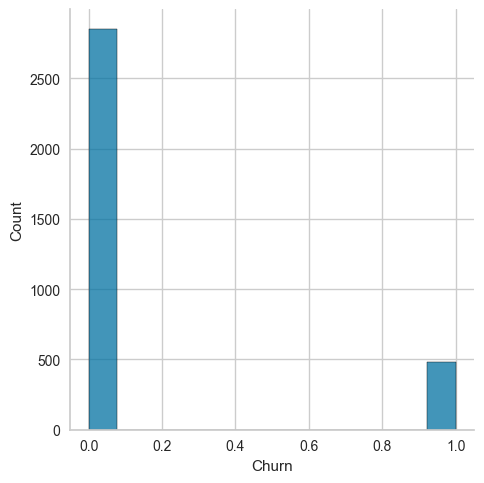

In [82]:
sns.displot(df['Churn']);

<Axes: >

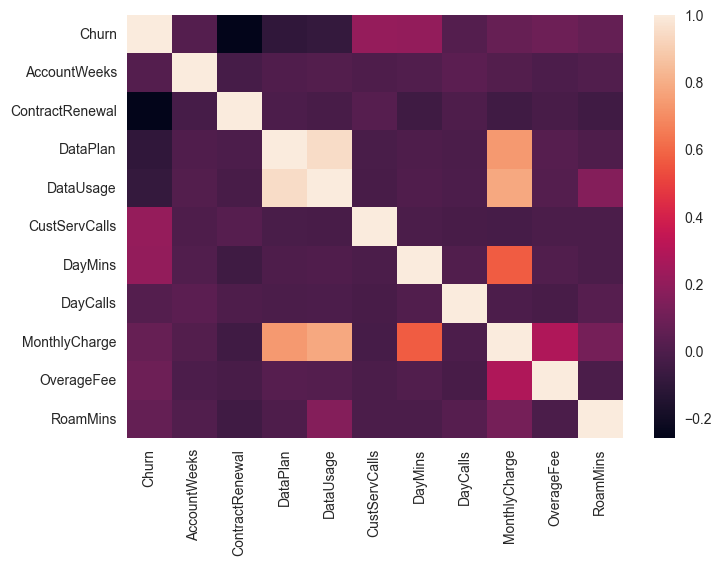

In [83]:
corr = df.corr()
sns.heatmap(corr)

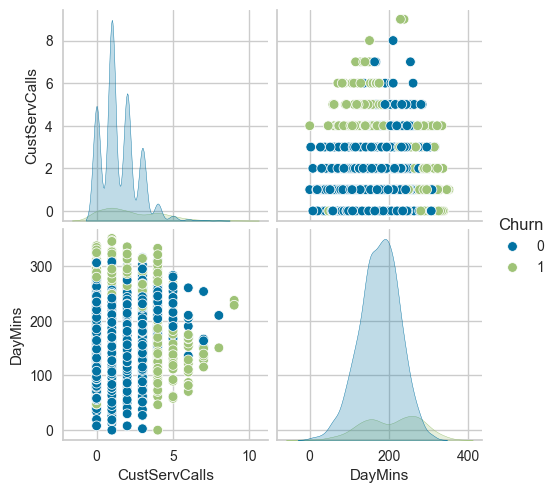

In [84]:
sns.pairplot(df[['Churn','CustServCalls','DayMins']], hue='Churn');

<Axes: xlabel='DataUsage', ylabel='Count'>

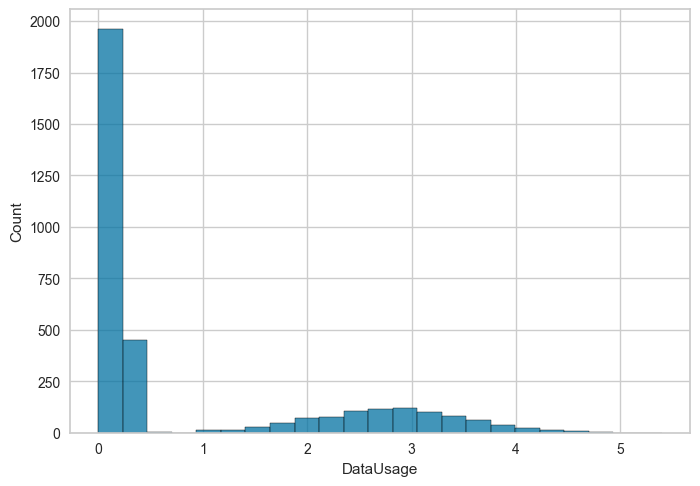

In [85]:
sns.histplot(df['DataUsage'])

<Axes: xlabel='DayMins', ylabel='Count'>

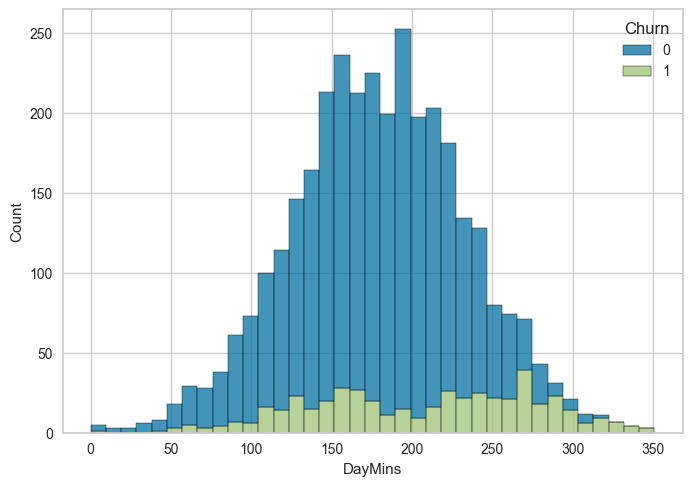

In [86]:
sns.histplot(data=df, x=df['DayMins'], hue='Churn',multiple='stack')


daymins >380~ = high porb of churn

<Axes: xlabel='DataPlan', ylabel='Count'>

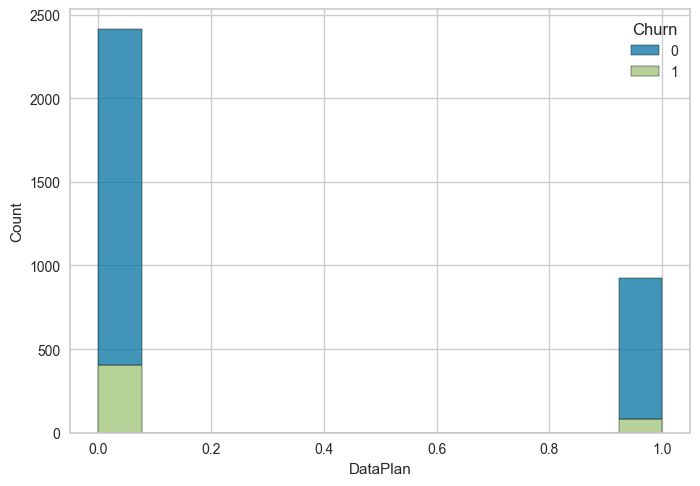

In [87]:
sns.histplot(data=df, x=df['DataPlan'], hue='Churn',multiple='stack')


<Axes: xlabel='DayMins', ylabel='DayCalls'>

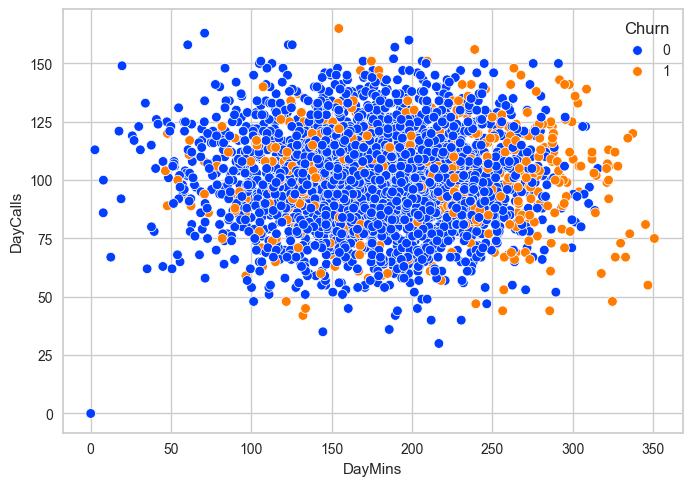

In [88]:
sns.scatterplot(data=df,x='DayMins',y='DayCalls', hue='Churn', zorder=2,palette='bright')

<Axes: xlabel='CustServCalls', ylabel='Count'>

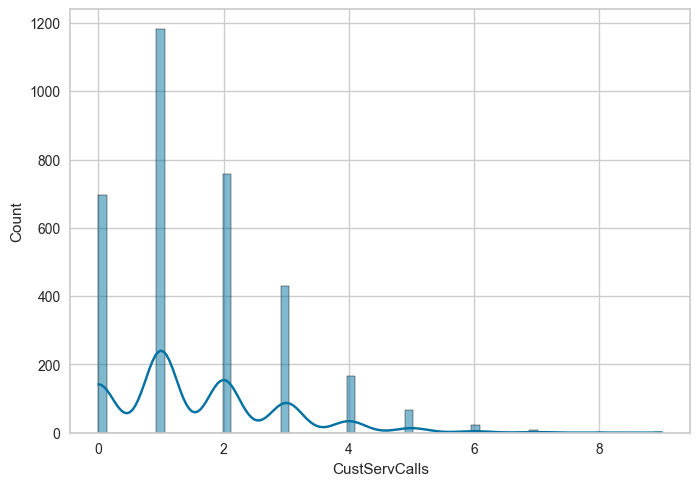

In [89]:
sns.histplot(df['CustServCalls'], kde=True)

## 3. Data Preparation

**Objective**: Prepare the final dataset that will be used for modeling.

### Steps:
- **Select Data**: Choose relevant data for the project.
  - Example: Select data for customers active in the last two years.
- **Clean Data**: Correct or remove erroneous data and handle missing values.
  - Example: Remove duplicates, impute missing values.
- **Construct Data**: Create derived or aggregated variables that may be useful for analysis.
  - Example: Create variables such as frequency of support calls.
- **Integrate Data**: Combine data from different sources if necessary.
  - Example: Merge customer demographic data with usage data.
- **Format Data**: Structure the data in a format suitable for modeling tools.
  - Example: Normalize variables, create training and test datasets.

In [90]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [91]:
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [92]:
X = df[['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins']]
y = df['Churn']

In [93]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64

In [94]:
X.head()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [95]:
# X = SelectKBest(f_classif, k=1).fit_transform(X, y)
# selectin best feature with Kbest get worst results

#### 4. Modeling
- **Techniques**: Random Forest, Logistic Regression.
- **Testing**: Train-test split, cross-validation.
- **Model Building**: Train models, optimize parameters.
- **Model Evaluation**: Assess performance with accuracy, precision, recall, F1-score.


In [96]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [97]:
X_train.shape,X_test.shape

((2666, 10), (667, 10))

# Testing multiples models  with sklearn

In [98]:

models = []

models.append(("LogisticRegression",LogisticRegression()))
models.append(("SVC",SVC()))
models.append(("LinearSVC",LinearSVC()))
models.append(("KNeighbors",KNeighborsClassifier()))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("RandomForest",RandomForestClassifier()))
rf2 = RandomForestClassifier(n_estimators=100, criterion='gini',
                                max_depth=10, random_state=0, max_features=None)
models.append(("RandomForest2",rf2))
models.append(("MLPClassifier",MLPClassifier(solver='lbfgs', random_state=0)))


results = []
names = []
for name,model in models:
    result = cross_val_score(model, X_train, y_train,  cv=3)
    names.append(name)
    results.append(result)

for i in range(len(names)):
    print(names[i],results[i].mean())

LogisticRegression 0.854836557592463
SVC 0.8570892320892322
LinearSVC 0.8593397953634175
KNeighbors 0.8612141387731939
DecisionTree 0.8856021375706415
RandomForest 0.9336109168786334
RandomForest2 0.9332359637477747
MLPClassifier 0.8627135290521117


* best model = random forest

In [99]:
#Training
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [100]:
pred = rf.predict(X_test)

In [101]:
y_test

438     0
2674    0
1345    1
1957    0
2148    0
       ..
2577    0
2763    0
3069    0
1468    0
582     0
Name: Churn, Length: 667, dtype: int64

In [102]:
pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [103]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Config GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='f1_macro')

# fit model
grid_search.fit(X_train, y_train)

# pick up the best param
best_params = grid_search.best_params_
print(f'Best params: {best_params}')

# score
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')
print(f'F1 Score: {f1}')

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best params: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
F1 Score: 0.8490745350047517


Training with best params

In [104]:
rf = RandomForestClassifier(**best_params,random_state=42)
rf.fit(X_train,y_train)
pred = rf.predict(X_test)


## 5. Evaluation

**Objective**: Thoroughly evaluate the models to ensure they meet business objectives.

### Steps:
- **Evaluate Results**: Check if models achieve the data mining and business goals.
  - Example: Random Forest model achieves an F1-score of 0.85.
- **Review Process**: Review all steps in the CRISP-DM process to identify improvements or corrections needed.
  - Example: Check data preprocessing steps, model selection.
- **Determine Next Steps**: Decide whether to implement the project or if further iterations are needed.
  - Example: Plan for model deployment or additional tuning.


* checking data dispersion

In [105]:
df['Churn'].value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

In [106]:
f1_score(y_test, pred)
print(f'F1 Score: {f1}')

F1 Score: 0.8490745350047517


In [107]:
precision = precision_score(y_test, pred)
print("Precision:", precision)

Precision: 0.9


In [108]:
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)

Accuracy: 0.9325337331334332


In [109]:
recall = recall_score(y_test, pred)
print("Recall:", recall)

Recall: 0.6237623762376238


In [110]:
class_report = classification_report(y_test, pred)
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       566
           1       0.90      0.62      0.74       101

    accuracy                           0.93       667
   macro avg       0.92      0.81      0.85       667
weighted avg       0.93      0.93      0.93       667



In [111]:
conf_matrix = confusion_matrix(y_test, pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[559   7]
 [ 38  63]]


0.9325337331334332

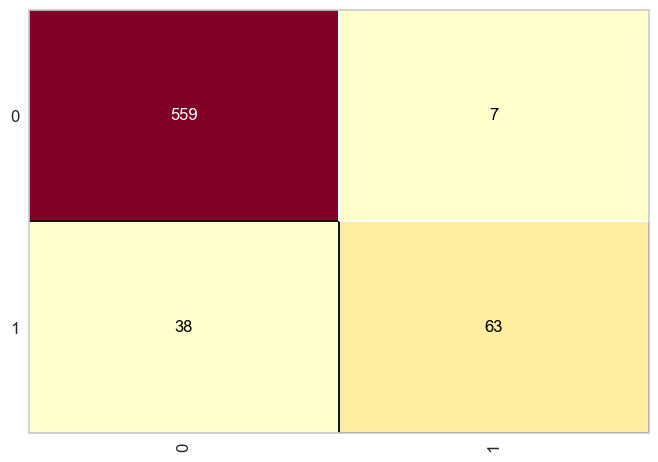

In [112]:
cm = ConfusionMatrix(rf)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

* ## FROM 62 TRUE CHURN, 12 IS false positive
* ## FROM 554 FALSE CHURN, 39 IS false negative

#### 6. Deployment
- **Deployment Plan**: Implement model in CRM system, schedule tasks.
- **Monitoring**: Set up regular performance tracking and model updates.
- **Final Report**: Document entire process and results.
- **Project Review**: Conduct a post-implementation review to gather feedback and lessons learned.


In [113]:
#saved the model to disk
from pickle import dump
with open("pickle/model.pkl", "wb") as f:
    dump(rf, f, protocol=5)
    

In [114]:
from pickle import load
with open("pickle/model.pkl", "rb") as f:
    model = load(f)

In [115]:
print(f'Model atributtes:\n\nClass:{model.classes_}\nEstimators:{model.n_estimators}\nParams:{model.get_params}\n')

Model atributtes:

Class:[0 1]
Estimators:100
Params:<bound method BaseEstimator.get_params of RandomForestClassifier(max_depth=20, max_features='log2', min_samples_leaf=2,
                       min_samples_split=10, random_state=42)>



In [116]:
X_train.head(1)

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
817,243,1,0,0.0,2,95.5,92,31.0,8.19,6.6


In [117]:
k = model.predict([[243,1,0,0.0,2,95.5,92,31.0,8.19,6.6]])

In [118]:
str(list(k)[0])

'0'

In [119]:
y_train.values[0]

0

In [120]:
model.feature_importances_

array([0.03971834, 0.09378025, 0.02432153, 0.07974434, 0.16207696,
       0.21078165, 0.03848502, 0.18986621, 0.08370633, 0.07751936])

# Telecommunications Company Churn Analysis Report

## Executive Summary:
This report presents the findings of a churn analysis conducted for XYZ Telecommunications Company. The analysis aimed to understand the factors influencing customer churn and to propose strategies for reducing churn rates. Data from the company's customer database was analyzed, focusing on demographic information, usage patterns, and service subscription details.

## Key Findings:

1. **Feature Importance:**
   - Analysis revealed that average daytime minutes per month (DayMins) had a strong positive correlation with churn probability, suggesting that customers with higher DayMins are more likely to churn.
   
2. **Segmentation Analysis:**
   - Customer segmentation based on DayMins and other features highlighted distinct groups with varying churn rates. Customers with high DayMins and long tenure were found to have the highest churn rates.
   
3. **Retention Strategies:**
   - Personalized offers and incentives targeting high DayMins customers were proposed to improve retention. Additionally, proactive communication and enhanced customer support for this segment were recommended.
   
4. **Future Recommendations:**
   - Further analysis of customer satisfaction and engagement metrics is recommended to gain deeper insights into the underlying reasons for churn. Continuous monitoring and adjustment of retention strategies based on evolving customer behavior are advised.

## Conclusion:
In conclusion, the analysis identified DayMins as a significant predictor of churn in XYZ Telecommunications Company. By implementing targeted retention strategies and closely monitoring customer behavior, the company can mitigate churn rates and improve overall customer satisfaction and loyalty.
